Librerias

In [2]:
import pandas as pd
import seaborn as sns
from sqlalchemy import engine
from pandasql import sqldf

pysqldf = lambda q: sqldf(q, globals())

Se leen los datos obtenidos en CSV mediante keywords de google ads y se visualiza la tabla

In [3]:
df = pd.read_csv('datos_google_ads.csv')
df

,Keyword,Currency,Avg. monthly searches,Cambio en los últimos tres meses,Cambio interanual,Competition,Competition (indexed value),Top of page bid (low range),Top of page bid (high range),Ad impression share,...,Searches: Dec 2022,Searches: Jan 2023,Searches: Feb 2023,Searches: Mar 2023,Searches: Apr 2023,Searches: May 2023,Searches: Jun 2023,Searches: Jul 2023,Searches: Aug 2023,Searches: Sep 2023
0,servicios financieros,ARS,500.0,900%,900%,Medio,36.0,18.49,976.27,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sector economico,ARS,5000.0,0%,0%,Bajo,0.0,36.04,71.55,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,asesores financieros,ARS,500.0,0%,0%,Medio,54.0,79.81,504.57,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,administración bancaria y financiera,ARS,50.0,0%,0%,Medio,60.0,35.61,185.32,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,financieras cerca de mi,ARS,50.0,0%,0%,Bajo,29.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,tores económicos,ARS,50.0,0%,-100%,Desconocido,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
376,toyota estados financieros,ARS,50.0,∞,∞,Bajo,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
377,trainer financiero,ARS,50.0,0%,0%,Alto,67.0,91.93,168.01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
378,tu asesor financiero,ARS,50.0,0%,0%,Medio,35.0,44.51,133.01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Se cuentan las cantidad de Filas x Columnas del dataset

In [4]:
df.shape

(380, 26)

Se chequea si existen Keywords duplicadas

In [5]:
df['Keyword'].duplicated().sum()

0

Se remueven valores nulos de las columnas Competition y Top of page bid

In [9]:
df = df.dropna(subset=['Competition (indexed value)'])
df = df.dropna(subset=['Top of page bid (low range)'])
df.head(5)



,Keyword,Currency,Avg. monthly searches,Cambio en los últimos tres meses,Cambio interanual,Competition,Competition (indexed value),Top of page bid (low range),Top of page bid (high range),Ad impression share,...,Searches: Dec 2022,Searches: Jan 2023,Searches: Feb 2023,Searches: Mar 2023,Searches: Apr 2023,Searches: May 2023,Searches: Jun 2023,Searches: Jul 2023,Searches: Aug 2023,Searches: Sep 2023
0,servicios financieros,ARS,500.0,900%,900%,Medio,36.0,18.49,976.27,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sector economico,ARS,5000.0,0%,0%,Bajo,0.0,36.04,71.55,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,asesores financieros,ARS,500.0,0%,0%,Medio,54.0,79.81,504.57,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,administración bancaria y financiera,ARS,50.0,0%,0%,Medio,60.0,35.61,185.32,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,inversiones financieras,ARS,500.0,0%,0%,Medio,49.0,68.77,269.09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Visualizacion hist con plot

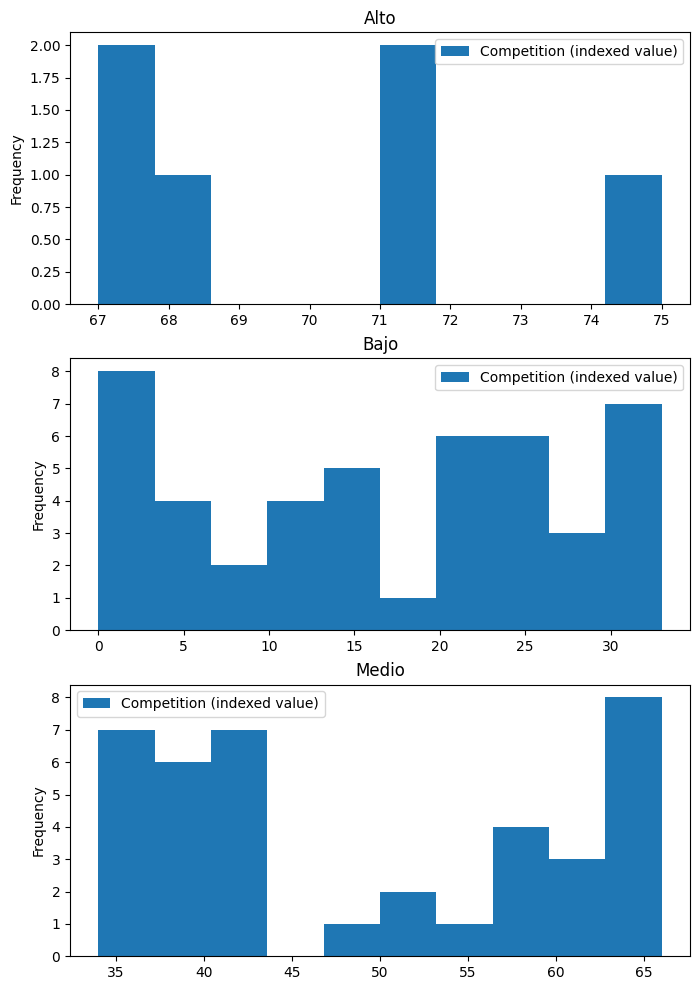

In [10]:
ax = df.plot.hist(column=['Competition (indexed value)'], by='Competition', bins=10, figsize=(8, 12))

<Axes: xlabel='Competition', ylabel='Avg. monthly searches'>

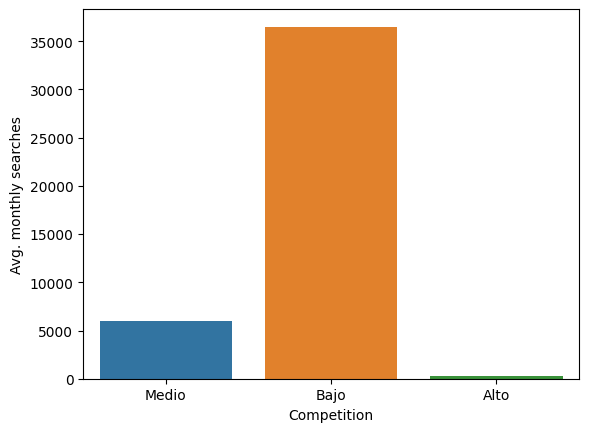

In [11]:
sns.barplot( data=df, x='Competition', y='Avg. monthly searches', errorbar=None, estimator=sum)

Chequeo de nombres de columnas para renombrarlas y que sean validas en SQL

In [12]:
df.head(5)

,Keyword,Currency,Avg. monthly searches,Cambio en los últimos tres meses,Cambio interanual,Competition,Competition (indexed value),Top of page bid (low range),Top of page bid (high range),Ad impression share,...,Searches: Dec 2022,Searches: Jan 2023,Searches: Feb 2023,Searches: Mar 2023,Searches: Apr 2023,Searches: May 2023,Searches: Jun 2023,Searches: Jul 2023,Searches: Aug 2023,Searches: Sep 2023
0,servicios financieros,ARS,500.0,900%,900%,Medio,36.0,18.49,976.27,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sector economico,ARS,5000.0,0%,0%,Bajo,0.0,36.04,71.55,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,asesores financieros,ARS,500.0,0%,0%,Medio,54.0,79.81,504.57,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,administración bancaria y financiera,ARS,50.0,0%,0%,Medio,60.0,35.61,185.32,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,inversiones financieras,ARS,500.0,0%,0%,Medio,49.0,68.77,269.09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df = df.rename(columns={'Top of page bid (low range)': 'Top_of_page_bid_low_range', 'Top of page bid (high range)': 'Top_of_page_bid_high_range', 'Competition (indexed value)': 'Competition_indexed_value', 'Avg. monthly searches': 'Avg_monthly_searches'})

Creacion de query con pandasql, donde se seleccionan 6 columnas segun el avg mensual y se ordenan. Se guardan en variable df_export

In [14]:
q = """
SELECT
    Keyword,
    Competition,
    Competition_indexed_value,
    Top_of_page_bid_low_range,
    Top_of_page_bid_high_range,
    Avg_monthly_searches
FROM df
WHERE avg_monthly_searches >= 500
ORDER BY avg_monthly_searches DESC
"""

df_export = pysqldf(q)

Exportacion de datos de SQL a CSV, luego se visualizan en el editor

In [15]:
df_export.to_csv('datos_google_ads_export.csv', index=False)

In [16]:
df_export

,Keyword,Competition,Competition_indexed_value,Top_of_page_bid_low_range,Top_of_page_bid_high_range,Avg_monthly_searches
0,sector economico,Bajo,0.0,36.04,71.55,5000.0
1,financieros,Bajo,25.0,32.29,143.51,5000.0
2,servicio financiero carrefour,Bajo,22.0,3.60,15.91,5000.0
3,banco de servicios financieros,Bajo,24.0,3.73,28.00,5000.0
4,sector económico,Bajo,0.0,36.04,71.55,5000.0
5,servicios financieros,Medio,36.0,18.49,976.27,500.0
6,asesores financieros,Medio,54.0,79.81,504.57,500.0
7,inversiones financieras,Medio,49.0,68.77,269.09,500.0
8,analisis financiero,Medio,42.0,54.85,166.39,500.0
9,consultoria financiera,Medio,42.0,58.55,392.03,500.0
